[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


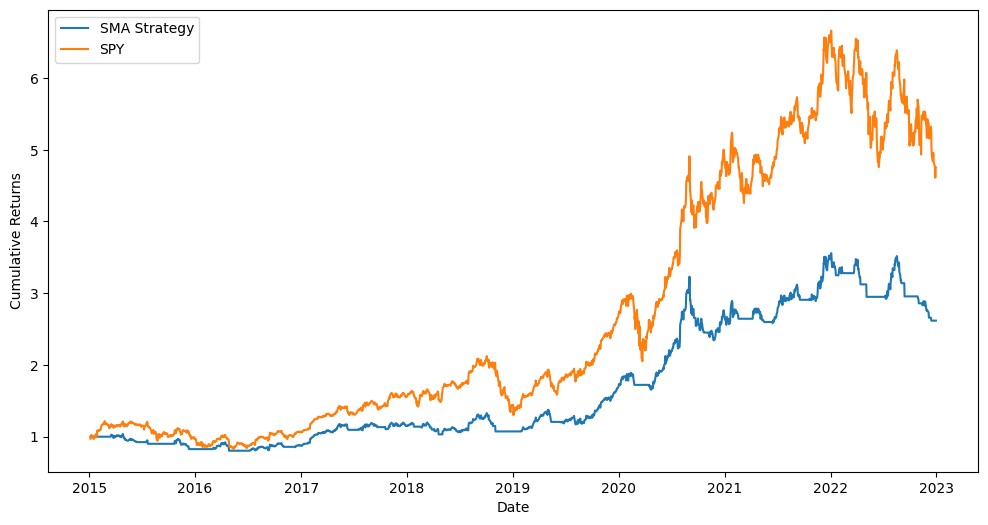

In [4]:
"""
Test a simple moving average strategy.
See: https://www.composer.trade/learn/building-and-deploying-a-stock-trading-bot-in-python-with-alpaca-simple-moving-average
"""

import numpy as np 
import pandas as pd 
import yfinance as yf 
import matplotlib.pyplot as plt

# Fetch historical data 
symbol = 'AAPL' 
start_date = '2015-01-01' 
end_date = '2022-12-31' 
data = yf.download(symbol, start=start_date, end=end_date)

# Compute the 50-day rolling average
data['SMA_50'] = data['Close'].rolling(window=50).mean()

# Add a signal to buy when it is above the SMA (1) or hold (0)
# (Shouldn't we buy when its low?)
# In this example there is no signal to sell.
data['Signal'] = np.where(data['Close'] > data['SMA_50'], 1, 0)

# Backtest on some other stocks. Here we use SPY (S&P 500 ETF)
# I think here we assume we buy at open based on the signal at close the day before
# And seems also we must sell at close on the day we buy, since there is no concept of account balance
data['Daily_Return'] = data['Close'].pct_change()
data['Strategy_Return'] = data['Daily_Return'] * data['Signal'].shift(1)
data['Cumulative_Return'] = (1 + data['Strategy_Return']).cumprod()
# Fetch historical data for SPY 
spy_data = yf.download('AAPL', start=start_date, end=end_date)
# Calculate daily returns and cumulative returns for SPY 
spy_data['Daily_Return'] = spy_data['Close'].pct_change() 
spy_data['Cumulative_Return'] = (1 + spy_data['Daily_Return']).cumprod()

# Plot both cumulative returns on the same chart 
plt.figure(figsize=(12, 6)) 
plt.plot(data.index, data['Cumulative_Return'], label='SMA Strategy') 
plt.plot(spy_data.index, spy_data['Cumulative_Return'], label='SPY') 
plt.xlabel('Date')
plt.ylabel('Cumulative Returns') 
plt.legend() 
plt.show()


I edited it a bit to backtest against buying and holding AAPL, since thats what the signal was on. Interestingly, if you buy when its below the 50 day moving average you do pretty much no trades since the stock generally goes up. So you don't make as much money. In the long run though this strategy makes a lot less money than buying and holding. But in the flat parts where you are not trading I guess you insulate yourself from loss and you can use your money to buy whatever else is going up that day.